## 01 Import used libraries

In [4]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [5]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [6]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [7]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   create a model using support vector machine using **sklearn.svm**

In [8]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test, class_weight = None):
  # standardize the data set
  svc = SVC(kernel="linear", class_weight = class_weight)

  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

*   Gausian Naive Bayes used to create the model

In [9]:
from sklearn.linear_model import LogisticRegression
def useLRC(X_train, y_train, X_test, class_weight= None):
  lrc = LogisticRegression(random_state=0, class_weight= "balanced")
  lrc.fit(X_train, y_train)
  y_pred = lrc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [10]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [11]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [12]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [13]:
train = pd.read_csv("drive/MyDrive/ML_Project/Layer_12_train.csv")
test = pd.read_csv("drive/MyDrive/ML_Project/Layer_12_valid.csv")
test_predict = pd.read_csv("drive/MyDrive/ML_Project/Layer_12_test.csv")


X_train_label1, y_train_label1= getTrainTestdata(train, "label_2",['label_1','label_3','label_4'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_2",['label_1','label_3','label_4'])
X_test_predict_label1  = test_predict.drop('ID', axis =1).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

 # scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-0.630873,-0.655294,-0.642161,1.151502,0.459712,-0.221291,-0.899225,-0.003819,0.382026,-0.497508,...,0.889985,-0.237332,-0.251666,-0.397138,0.604444,1.490665,0.915195,-0.664911,0.479446,-0.820229
1,2.479433,0.491741,1.255683,-0.556643,-1.016640,0.253103,-0.465442,-0.803432,-1.376864,2.141880,...,-0.637134,2.010321,0.000488,-2.001616,-1.567300,-1.684624,0.307617,-0.109493,1.397753,2.577054
2,-0.087767,-0.281834,-0.322683,0.634106,-0.306794,0.354339,-0.344953,-0.342429,0.526249,-0.160598,...,0.324172,-0.357041,-0.360929,0.128646,0.252556,0.767148,-0.488240,-0.684929,0.258426,-0.677468
3,2.785408,0.167770,2.721313,-1.904412,-2.097834,-2.411121,-0.086094,-1.742361,-2.554284,0.043761,...,-1.857136,0.199527,-0.346185,-2.692809,-1.927088,-0.252476,-0.097506,2.199350,1.225882,1.501435
4,-0.029893,-0.316607,-0.532097,1.014699,0.186310,-0.005257,0.673040,0.890034,0.416525,-0.737167,...,1.147367,-0.912689,-0.455501,0.848595,0.336797,1.453790,-0.602997,-0.873013,0.800488,-0.511444


<Axes: >

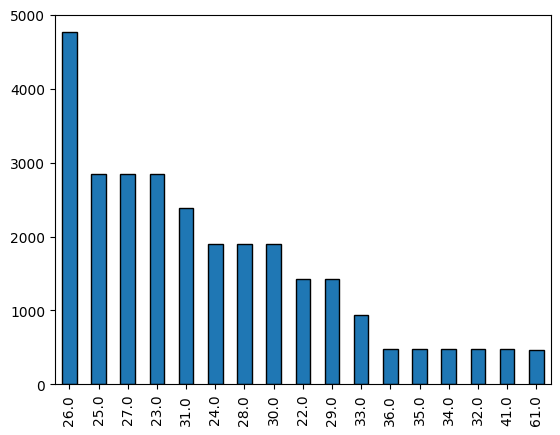

In [14]:
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

<Axes: >

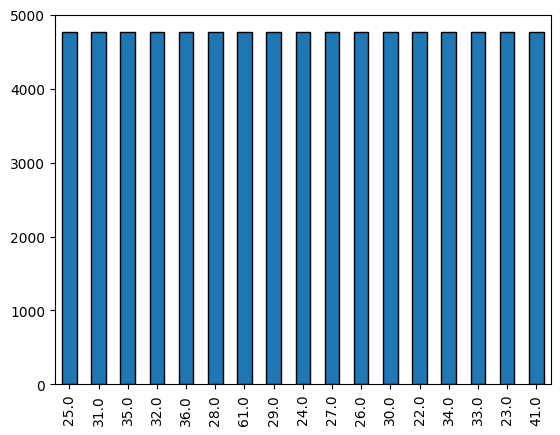

In [15]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_label1_balanced, y_train_label1_balanced = RandomOversamples.fit_resample(X_train_label1, y_train_label1)
y_train_label1_balanced.value_counts().plot(kind='bar', edgecolor='black')

### create a model using Random Forest before feature engineering

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

predict_values = useRandommForestModel(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, predict_values)

[[ 0  2  1  1 13 11  4  0  3  0  0  0  1  0  0  0  0]
 [ 0  5  1  2 16 20 17  1  6  3  0  0  0  0  0  0  0]
 [ 0  2  5  0 10 20  4  1  3  1  0  0  0  0  0  0  0]
 [ 0  3  5  2 13 32 10  0 12  2  0  0  0  0  0  0  0]
 [ 1  7  7  1 27 35 24  0  7  6  0  0  0  0  0  0  0]
 [ 0  4  9  3 17 33 10  0  3  2  0  0  0  0  0  0  0]
 [ 0  2  5  1  9 18  5  0  6  0  0  0  0  0  0  0  0]
 [ 0  3  2  1 10 16  9  0  1  3  0  0  0  0  0  0  0]
 [ 0  0  3  3  8 21  7  1  4  1  0  0  0  0  0  0  0]
 [ 0  1  4  3 13 26  8  2  6  1  0  0  1  0  0  0  0]
 [ 0  2  0  0  1  4  2  0  2  0  0  0  0  0  0  0  0]
 [ 0  1  3  0  4 12  4  0  4  1  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  9  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  1  4  3  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  1  1  2  1  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  2  0  3  4  2  0  2  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0 13  0  0  2  0  0  0  0  0  0  0  1]]
Accuracy: 0.11548913043478261
F1 Score: 0.09019658514861831
Precision: 0.15535702

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### create a model using Random KNN before feature engineering

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 8  0  7  0  6  3  7  2  0  0  1  0  2  0  0  0  0]
 [ 4 13 14  3 15  3 10  1  2  1  4  0  1  0  0  0  0]
 [ 1  0 23  1  0  2  9  0  0  2  0  1  7  0  0  0  0]
 [ 7 13 14  7  3  4 11  4  3  4  2  3  3  1  0  0  0]
 [ 4 13 23  3 40  4 13  1  3  1  7  1  2  0  0  0  0]
 [ 4  5 14  3  3 22  8  7  0  5  2  1  7  0  0  0  0]
 [ 0  5  8  1  5  0 24  0  2  0  1  0  0  0  0  0  0]
 [ 0  4 11  0  6  1  5 12  0  0  1  0  5  0  0  0  0]
 [ 0  6  8  3  7  6  9  1  5  0  2  0  1  0  0  0  0]
 [ 4  5 15  1  8  7  9  1  2  3  0  0  9  1  0  0  0]
 [ 1  4  0  1  0  0  2  0  0  0  3  0  0  0  0  0  0]
 [ 2  2  7  1  2  0  2  1  1  0  1 10  1  0  0  0  0]
 [ 0  0  6  0  0  0  2  0  0  0  0  0  3  0  0  0  0]
 [ 0  2  1  0  1  0  0  0  0  0  1  0  0  6  0  0  0]
 [ 0  2  0  0  0  0  3  0  0  1  0  0  0  0  2  0  0]
 [ 1  0  1  0  2  1  4  3  0  0  2  0  0  0  0  0  0]
 [ 0  0  4  2  2  0  5  0  1  1  0  0  2  0  0  0  2]]
Accuracy: 0.24864130434782608
F1 Score: 0.24411753187206814
Precision: 0.31649554

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 8  0  3  1  2  0 10  5  0  0  2  1  4  0  0  0  0]
 [ 3  9 14  7  4  0 18  5  1  1  5  1  3  0  0  0  0]
 [ 1  0 16  0  0  1 12  3  0  0  1  1 11  0  0  0  0]
 [ 3  4 10  3  0  3 22  6  5  2 12  4  2  1  0  0  2]
 [ 6  5 27  5  6  3 28 10  0  1 13  3  7  0  1  0  0]
 [ 6  3 12  0  1 12 11  9  1  4  6  1 15  0  0  0  0]
 [ 0  3  6  1  0  2 28  2  1  1  0  0  2  0  0  0  0]
 [ 0  0 10  1  1  1  6 14  1  0  4  1  6  0  0  0  0]
 [ 0  1  5  1  0  2 20  3  7  0  5  0  4  0  0  0  0]
 [ 2  1 13  0  2  1 18  4  2  5  4  1 12  0  0  0  0]
 [ 0  1  1  1  0  1  2  0  0  0  5  0  0  0  0  0  0]
 [ 0  1  5  1  0  0  5  2  2  1  1 11  1  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  1  1  0  0  1  1  1  0  1  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  1  0  3  0  0]
 [ 0  0  0  0  0  1  5  2  0  0  6  0  0  0  0  0  0]
 [ 0  0  4  1  1  0  5  1  1  2  0  0  1  0  0  0  3]]
Accuracy: 0.19293478260869565
F1 Score: 0.1811580339301787
Precision: 0.296035355

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### create a model using Random SVC before feature engineering

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)


[[13  1  1  0  1  3  2  0  0  0  6  0  2  0  6  1  0]
 [22  3  0  0  2  6  8  0  3  0  2  3  1  0 21  0  0]
 [13  0  4  0  1  9  6  1  1  0  1  2  1  0  7  0  0]
 [21  2  2  0  1  8 14  0  1  0  8  4  1  0 16  1  0]
 [21  2  7  0  4  9 15  0  2  0 13 14  1  0 27  0  0]
 [25  0  4  0  1 20  7  0  1  0  5  2  6  0  9  1  0]
 [17  1  1  0  1  7 10  0  0  0  0  1  0  0  8  0  0]
 [20  0  0  0  0  3  7  0  0  0  5  3  4  0  3  0  0]
 [ 9  0  2  0  3 13  9  0  0  0  2  3  1  0  6  0  0]
 [19  0  2  0  0 11  6  0  0  0  7  3  2  0 15  0  0]
 [ 1  0  0  0  0  0  2  0  0  0  5  2  0  1  0  0  0]
 [ 3  1  0  0  0  4  3  0  1  0  3  8  0  0  7  0  0]
 [ 5  0  0  0  0  1  1  0  0  0  0  0  2  0  2  0  0]
 [ 1  0  0  0  0  1  2  0  0  0  3  1  0  2  1  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  1  0  0  0  5  0  0]
 [ 5  0  0  0  0  1  3  0  0  0  2  1  0  0  1  1  0]
 [ 1  0  1  0  0  1  3  0  1  0  2  3  0  0  5  0  2]]
Accuracy: 0.10733695652173914
F1 Score: 0.08670122349425514
Precision: 0.16603738

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1, "balanced")
Summary = getSummary(y_test_label1, y_pred)

[[16  0  3  0  0  0  3  0  0  0  6  0  2  0  6  0  0]
 [23  2  0  0  0  4 11  0  3  0  2  4  1  0 21  0  0]
 [10  2  6  0  1  8  7  1  1  0  1  2  1  0  6  0  0]
 [20  1  3  0  1  6 15  0  2  0  8  5  1  0 16  1  0]
 [22  4  8  0  3  6 13  0  1  0 13 14  1  0 30  0  0]
 [23  2  5  0  0 19  9  0  0  0  6  2  6  0  8  1  0]
 [16  1  2  0  0  6 11  0  0  0  0  1  0  0  9  0  0]
 [17  0  1  0  0  2  9  0  0  0  5  3  4  0  4  0  0]
 [12  1  2  0  0  9 11  0  0  0  2  3  1  0  7  0  0]
 [17  2  1  0  0 11  7  0  0  0  6  3  2  0 16  0  0]
 [ 1  0  0  0  0  0  2  0  0  0  5  2  0  1  0  0  0]
 [ 3  1  0  0  0  4  3  0  1  0  3  8  0  0  7  0  0]
 [ 6  0  0  0  0  0  1  0  0  0  0  0  2  0  2  0  0]
 [ 2  0  0  0  0  1  1  0  0  0  3  1  0  2  1  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  1  0  0  0  5  0  0]
 [ 5  0  0  0  0  1  3  0  0  0  2  1  0  0  1  1  0]
 [ 0  0  1  0  0  1  4  0  1  0  2  3  0  0  5  0  2]]
Accuracy: 0.11141304347826086
F1 Score: 0.08752245215185037
Precision: 0.20558554

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### create a model using Random LRC before feature engineering

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 3  0  3  0  2  2  1  0  0 10  0  2  4  0  9  0  0]
 [ 3  3  4  0  8  4  0  0  1 12  0 10  2  0 23  1  0]
 [ 0  0  5  0 12  6  1  0  1  3  0  0  2  0 16  0  0]
 [ 1  1  3  0  7  7  1  0  0 16  2  6  5  0 29  1  0]
 [ 1  2 12  0 20 11  1  0  1 22  0  3  1  0 41  0  0]
 [ 0  2  2  0 14 16  2  0  1 14  0  2  7  0 19  2  0]
 [ 1  2  4  0 11  7  3  0  0  7  0  2  1  0  7  1  0]
 [ 2  0  4  0  7  0  0  0  0 10  2  3  8  0  9  0  0]
 [ 0  1  2  0 13  3  1  0  1  7  2  1  0  0 16  1  0]
 [ 1  1  5  0  5  5  0  0  0 13  2  4  3  0 26  0  0]
 [ 0  0  0  0  2  0  2  0  0  1  2  1  0  0  3  0  0]
 [ 0  0  2  0  3  4  0  0  1  1  1  3  3  0 12  0  0]
 [ 1  0  1  0  4  0  0  0  0  0  0  0  3  0  2  0  0]
 [ 0  0  0  0  2  1  0  0  0  0  0  0  0  5  3  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0  0  6  0  0]
 [ 0  1  0  0  1  2  0  0  2  1  1  2  0  0  3  1  0]
 [ 1  1  3  0  2  1  0  0  0  3  2  3  1  0  1  1  0]]
Accuracy: 0.11413043478260869
F1 Score: 0.11024079195575114
Precision: 0.14725941

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1, "balanced")
Summary = getSummary(y_test_label1, y_pred)

[[ 8  0  2  0  3  4  1  0  0 11  1  1  0  0  5  0  0]
 [ 5  4  1  0 13  5  0  0  1 13  0  9  1  0 18  1  0]
 [ 1  0  1  0 18  6  2  0  1  6  0  0  1  0 10  0  0]
 [ 3  1  0  0 17 12  1  0  0 16  2  7  3  0 17  0  0]
 [ 3  2  4  0 37 10  2  0  0 26  2  4  1  0 24  0  0]
 [ 5  2  1  0 17 22  0  0  0 18  0  2  3  0  9  2  0]
 [ 3  2  0  0 16  9  2  0  0  7  0  2  0  0  4  1  0]
 [ 3  0  0  0 11  1  0  0  0 11  2  3  6  0  8  0  0]
 [ 1  1  0  0 15  6  3  0  0  9  2  1  0  0 10  0  0]
 [ 3  1  3  0  9  7  0  0  0 16  3  3  2  0 18  0  0]
 [ 1  0  0  0  2  0  1  0  0  1  4  1  0  0  1  0  0]
 [ 0  0  1  0  5  6  0  0  0  1  2  3  3  0  9  0  0]
 [ 3  0  0  0  4  0  0  0  0  0  0  1  2  0  1  0  0]
 [ 0  0  0  0  2  1  1  0  0  0  1  2  0  3  1  0  0]
 [ 0  0  0  0  2  0  0  0  0  2  0  0  0  0  4  0  0]
 [ 0  1  0  0  2  2  2  0  0  2  1  1  0  0  2  1  0]
 [ 1  1  0  0  4  1  0  0  0  5  2  2  1  0  1  1  0]]
Accuracy: 0.1453804347826087
F1 Score: 0.12426385257915928
Precision: 0.142791478

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

### Add KNN predicted data since it has the better accuracy to csv file

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# predicted_values = dict()

# Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
# predicted_values['Predicted labels before feature engineering'] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [16]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_7', 'feature_10', 'feature_11', 'feature_14', 'feature_15',
       'feature_17', 'feature_20', 'feature_22', 'feature_24', 'feature_25',
       ...
       'feature_739', 'feature_743', 'feature_744', 'feature_747',
       'feature_749', 'feature_752', 'feature_758', 'feature_764',
       'feature_765', 'feature_768'],
      dtype='object', length=300)


In [17]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using random forest

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

predict_values = useRandommForestModel(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, predict_values)

[[ 0  0  6  0  5 12  6  0  1  5  0  0  1  0  0  0  0]
 [ 0  3 15  0 12 31  5  0  3  2  0  0  0  0  0  0  0]
 [ 0  1  9  1  6 22  1  0  0  4  0  1  1  0  0  0  0]
 [ 0  3 13  6  7 31  9  0  1  7  0  1  1  0  0  0  0]
 [ 0 11 17  5 20 43  6  0  4  7  0  1  1  0  0  0  0]
 [ 0  0  8  1  9 38 10  0  3 11  0  1  0  0  0  0  0]
 [ 0  3  9  3  5 14  3  0  4  3  0  1  1  0  0  0  0]
 [ 0  3 10  2  6 15  3  0  5  1  0  0  0  0  0  0  0]
 [ 0  3 10  2  2 24  0  0  3  4  0  0  0  0  0  0  0]
 [ 0  5 18  1  7 25  8  0  0  1  0  0  0  0  0  0  0]
 [ 0  2  1  1  1  4  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  2  0  7 11  4  0  2  2  0  1  0  0  0  0  0]
 [ 0  0  2  0  0  7  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  3  0  2  3  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  3  0  1  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  2  2  5  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  1  5  0  2  6  1  0  1  0  0  1  0  0  0  0  2]]
Accuracy: 0.12092391304347826
F1 Score: 0.10022380767729089
Precision: 0.14531484

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check the accuracy of the selected features are enogh or not using KNN

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")
print(classification_report)

[[ 2  2  3  2  9  4  6  0  0  1  2  0  5  0  0  0  0]
 [ 5  7  9  7 12  0 10  0  2  0 13  2  4  0  0  0  0]
 [ 1  1 17  2  5  4  6  2  0  0  3  1  4  0  0  0  0]
 [ 4  8 10  9 10  3 14  2  0  0 11  3  4  1  0  0  0]
 [ 1 10 11  7 29  7 19  2  0  4 16  6  3  0  0  0  0]
 [ 5  9 14  8 10 15 12  2  0  1  0  1  4  0  0  0  0]
 [ 4  4  3  4  1  5 13  0  0  1  8  2  1  0  0  0  0]
 [ 3  2  2  5 11  1  7  4  0  0  4  0  6  0  0  0  0]
 [ 0  1  7  3  9  1 11  2  1  1  8  1  3  0  0  0  0]
 [ 4  3 10  8 11  3  8  0  3  3  4  1  6  0  1  0  0]
 [ 0  0  0  2  3  0  2  0  0  0  4  0  0  0  0  0  0]
 [ 2  1  5  0  5  0  4  0  1  0  3  9  0  0  0  0  0]
 [ 0  0  1  1  1  2  0  0  0  0  1  0  5  0  0  0  0]
 [ 0  0  0  1  0  1  1  0  4  0  1  0  0  3  0  0  0]
 [ 1  0  0  2  2  0  1  0  0  0  0  1  0  0  1  0  0]
 [ 1  1  0  0  5  0  5  1  0  0  1  0  0  0  0  0  0]
 [ 1  2  1  4  1  0  5  0  0  0  1  1  1  0  0  0  2]]
Accuracy: 0.16847826086956522
F1 Score: 0.16303469041381194
Precision: 0.22563860

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check the accuracy of the selected features are enogh or not using SVC

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")
print(classification_report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 9  0  0  0  0  0  0  0  0  0  0  0 14  0 13  0  0]
 [15  0  0  1  0  0  0  0  0  0  0  0 10  0 43  0  2]
 [ 4  2  0  1  0  0  0  0  0  0  0  0 10  0 27  0  2]
 [15  0  0  2  0  0  0  0  0  1  1  0 10  0 43  0  7]
 [28  0  0  1  0  0  1  0  0  0  2  2 14  0 64  0  3]
 [19  0  0  2  1  0  0  0  0  0  0  1 19  0 37  0  2]
 [17  1  0  3  0  0  0  0  0  1  0  0  8  0 16  0  0]
 [13  0  0  1  0  0  0  0  0  1  0  0 17  0 13  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  7  0 32  0  1]
 [23  0  0  2  0  0  0  0  0  0  1  0  7  0 31  0  1]
 [ 7  0  0  0  0  0  0  0  0  0  1  0  0  0  3  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  4  0 18  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  8  0  1  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  1  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  6  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  3  0  6  0  0]
 [ 2  0  0  1  0  0  1  0  0  0  0  1  0  0 11  0  3]]
Accuracy: 0.03940217391304348
F1 Score: 0.016239397652544955
Precision: 0.0247818

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Create a PCA to create new features using train data

In [18]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.99, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC376', 'PC377', 'PC378', 'PC379', 'PC380', 'PC381', 'PC382', 'PC383',
       'PC384', 'PC385'],
      dtype='object', length=385)


In [19]:
pca1, X_train_pca1, X_test_pca1, X_test_predict_pca1 = apply_pca(0.95, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca1.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC142', 'PC143', 'PC144', 'PC145', 'PC146', 'PC147', 'PC148', 'PC149',
       'PC150', 'PC151'],
      dtype='object', length=151)


<Axes: >

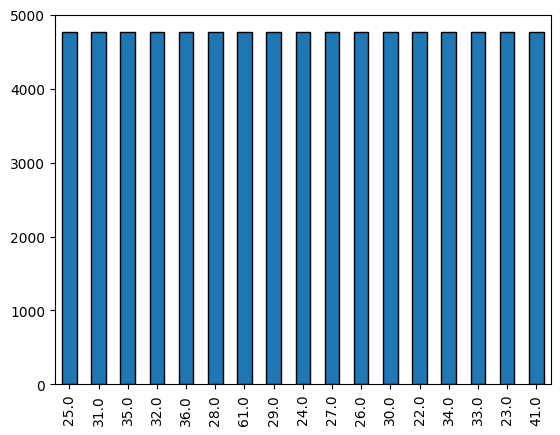

In [20]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_pca_balanced, y_train_pca_balanced = RandomOversamples.fit_resample(X_train_pca, y_train_label1)
y_train_pca_balanced.value_counts().plot(kind='bar', edgecolor='black')

In [21]:
X_train_pca_balanced.head()
print(X_train_pca_balanced.shape)

(80954, 385)


### USE RANDOMFOREST

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

# train_X_1, test_X_1 = pca(X_train_pca, y_train_label1, X_test_pca, y_test_label1)
predict_val = useRandommForestModel(X_train_pca_balanced, y_train_pca_balanced, X_test_pca)
Summary = getSummary(y_test_label1, predict_val)
# print(predict_values)
print("Mean absolute error after adding new pca features of the model Lable_1: ")
print("Classification report: \n", classification_report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 0  1  5  1  2  7 10  3  1  1  1  0  2  1  1  0  0]
 [ 1  8  6  1 11 13 15  7  4  1  1  0  2  0  0  0  1]
 [ 0  2  6  0  5  6 19  3  1  0  0  1  2  1  0  0  0]
 [ 3  7  7  2  8 10 26  0  2  1  1  2  6  2  1  0  1]
 [ 5  3  8  1 17 15 38  5  7  4  2  2  2  5  1  0  0]
 [ 2  2 11  0  9 19 21  3  1  2  1  1  4  4  1  0  0]
 [ 0  1  6  2  4  7 14  2  4  0  1  0  3  2  0  0  0]
 [ 3  1  4  0  6  7 11  3  0  2  1  1  5  1  0  0  0]
 [ 1  3  4  1  6  7 14  1  6  0  1  2  1  0  1  0  0]
 [ 2  7  2  0 13 14 13  2  1  0  4  0  4  2  1  0  0]
 [ 0  1  2  0  0  1  3  0  2  0  2  0  0  0  0  0  0]
 [ 0  1  1  3  5  2 10  0  1  0  0  5  1  1  0  0  0]
 [ 0  0  2  0  0  3  4  1  0  0  0  0  1  0  0  0  0]
 [ 1  1  0  0  1  2  2  0  1  0  0  0  0  3  0  0  0]
 [ 0  0  2  0  1  1  3  0  0  0  0  1  0  0  0  0  0]
 [ 1  1  0  0  1  3  4  1  1  0  0  0  2  0  0  0  0]
 [ 2  0  1  0  1  2  8  0  1  0  0  1  0  1  0  0  2]]
Accuracy: 0.11956521739130435
F1 Score: 0.11239531372517397
Precision: 0.14384556

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Find the status of the model using KNN after joining PCAs

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 9  2  6  0  7  1  7  2  0  0  0  0  2  0  0  0  0]
 [ 5 13 11  4 11  3 16  2  2  1  2  0  1  0  0  0  0]
 [ 2  1 19  1  0  1 10  0  0  6  0  1  5  0  0  0  0]
 [ 5 13 13  7  6  4 16  3  2  4  2  2  1  1  0  0  0]
 [ 7 12 26  4 29  4 23  0  0  2  5  1  2  0  0  0  0]
 [ 5  6 17  0  2 21 10  8  1  5  2  1  3  0  0  0  0]
 [ 0  7 10  1  2  2 22  1  1  0  0  0  0  0  0  0  0]
 [ 1  2 11  0  6  2  7 10  0  1  0  1  4  0  0  0  0]
 [ 0  5  7  2  7  5 11  1  6  0  2  1  1  0  0  0  0]
 [ 5  4 16  0  7  7  9  2  1  4  0  0  9  1  0  0  0]
 [ 1  2  0  1  1  0  2  1  0  0  3  0  0  0  0  0  0]
 [ 0  3  6  1  2  1  4  0  2  1  0 10  0  0  0  0  0]
 [ 0  0  4  0  0  0  3  0  0  0  0  0  4  0  0  0  0]
 [ 0  2  1  2  0  0  0  0  0  0  1  0  0  5  0  0  0]
 [ 0  1  1  1  0  0  3  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  1  0  3  0  5  2  0  0  2  0  0  0  0  0  0]
 [ 1  2  5  2  0  0  5  0  1  0  0  0  1  0  0  0  2]]
Accuracy: 0.22554347826086957
F1 Score: 0.2259272228028657
Precision: 0.306499675

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca_balanced, y_train_pca_balanced, X_test_pca, 6)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[17  2  4  0  1  1  4  4  0  0  1  0  2  0  0  0  0]
 [ 9 11 11  1  2  2 16  2  3  3  6  1  4  0  0  0  0]
 [ 1  1 19  0  0  1  7  2  0  1  3  1 10  0  0  0  0]
 [ 7  6  8  8  0  6 11  9  2  5  7  6  3  1  0  0  0]
 [13 11 26  3  6  6 15  4  2  7 12  5  5  0  0  0  0]
 [ 7  5 13  0  1  8 10 12  2  6  3  1 13  0  0  0  0]
 [ 3  6 11  0  1  4 13  1  2  3  0  0  2  0  0  0  0]
 [ 2  0  9  0  0  2  4 13  2  3  4  1  5  0  0  0  0]
 [ 2  6  6  2  2  4  8  1  7  0  4  2  4  0  0  0  0]
 [ 4  3 13  1  2  1  5  6  2  9  3  1 13  0  0  2  0]
 [ 0  2  0  0  0  0  3  0  0  1  5  0  0  0  0  0  0]
 [ 1  2  2  0  0  1  3  0  3  3  2 12  1  0  0  0  0]
 [ 0  0  2  0  0  0  3  0  0  0  0  0  6  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  1  0  2  0  0  5  0  0  0]
 [ 0  1  0  0  0  1  3  0  0  0  0  0  1  0  2  0  0]
 [ 0  1  1  0  0  0  3  1  0  0  7  0  0  0  0  1  0]
 [ 0  0  5  1  0  1  2  1  1  3  0  1  2  0  0  0  2]]
Accuracy: 0.1956521739130435
F1 Score: 0.18691361817648944
Precision: 0.309327596

### Find the status of the model using SVC after joining PCAs

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 5  0  5  0  0  0  9  0  0  2  1  7  5  0  2  0  0]
 [ 1  5  5  0  0  1 25  0  1  2  1 17  4  0  8  1  0]
 [ 0  3  8  1  2  3 13  0  0  1  0  5  3  0  4  3  0]
 [ 0  2  7  0  1  2 24  0  2  4  5 19  3  0  4  6  0]
 [ 0  5  9  1  4  1 29  0  0 11  9 25  7  0 13  1  0]
 [ 3  2  7  0  1  9 20  0  1 11  2  6  9  0  4  6  0]
 [ 3  0  0  0  0  3 24  0  0  4  0  6  3  1  2  0  0]
 [ 3  1  6  0  0  1 14  0  0  3  2  6  8  0  1  0  0]
 [ 2  1  4  0  0  2 17  0  1  5  1  8  2  0  2  3  0]
 [ 4  1  3  0  0  6 11  0  1  9  4 10  8  1  7  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  5  2  0  1  0  0  0]
 [ 0  1  5  0  0  0  5  0  0  2  4  9  0  0  3  1  0]
 [ 0  0  1  0  0  0  2  0  0  1  0  0  6  0  1  0  0]
 [ 2  0  0  0  0  0  2  0  0  1  1  1  0  4  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  1  1  1  0  3  0  0]
 [ 0  0  0  0  0  0  4  0  0  2  2  0  0  1  1  4  0]
 [ 0  2  2  0  0  1  4  0  0  0  0  6  0  0  2  0  2]]
Accuracy: 0.1331521739130435
F1 Score: 0.10943085618072006
Precision: 0.226807976

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.svm import SVC

# standardize the data set
svc = SVC(kernel="linear" , class_weight = "balanced")

svc.fit(X_train_pca, y_train_label1)
y_pred = svc.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 5  0  5  0  0  0  7  0  0  4  1  8  4  0  2  0  0]
 [ 0  3  5  0  0  1 27  0  2  1  1 18  4  0  8  1  0]
 [ 1  2  7  2  1  3 15  0  0  1  0  6  2  0  3  3  0]
 [ 0  3  6  0  2  0 24  0  3  6  5 18  2  0  4  6  0]
 [ 1  3 10  1  4  2 27  0  0 14  9 25  6  0 12  1  0]
 [ 3  2  5  0  1  6 18  0  1 13  2  9  9  0  5  7  0]
 [ 1  0  0  0  0  2 26  0  0  6  0  5  3  1  2  0  0]
 [ 2  1  5  0  0  1 14  0  0  3  2  8  8  0  1  0  0]
 [ 2  1  2  0  0  3 16  0  0  5  1 11  2  0  2  3  0]
 [ 4  1  3  0  0  5 12  0  1  8  4 10  9  1  7  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  5  2  0  1  0  0  0]
 [ 1  0  3  0  0  1  5  0  1  2  4  9  0  0  3  1  0]
 [ 0  0  0  0  0  0  2  0  0  1  0  0  7  0  1  0  0]
 [ 2  0  0  0  0  0  2  0  0  1  1  1  0  4  0  0  0]
 [ 0  0  2  0  0  0  1  0  0  0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0  4  0  0  3  2  0  0  1  1  3  0]
 [ 0  1  2  0  0  1  4  0  0  1  0  6  0  0  2  0  2]]
Accuracy: 0.125
F1 Score: 0.09540853253336776
Precision: 0.20138794542423555
Reca

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Join the newly created features with the selected features and find the status of the model using Random forest

In [22]:
X_train_new_label1 = X_train_selected_label1.join(X_train_pca)
X_test_new_label1 = X_test_selected_label1.join(X_test_pca)
X_test_predict_new_label1 = X_test_predict_selected_label1.join(X_test_predict_pca)

# X_train_new_label1 = pd.concat([X_train_pca, X_train_selected_label1], axis=1)
# X_test_new_label1 = pd.concat([X_test_pca, X_test_selected_label1], axis=1)
# X_test_predict_new_label1 = pd.concat([X_test_predict_pca, X_test_predict_selected_label1], axis=1)
X_train_new_label1.head()

,feature_7,feature_10,feature_11,feature_14,feature_15,feature_17,feature_20,feature_22,feature_24,feature_25,...,PC376,PC377,PC378,PC379,PC380,PC381,PC382,PC383,PC384,PC385
0,-0.899225,-0.497508,0.262576,-0.167220,-0.134287,-0.532297,0.183996,0.266300,-0.488072,-0.046273,...,0.035391,0.122401,0.057728,-0.105995,-0.222480,-0.041436,-0.009928,0.077462,-0.421927,0.096015
1,-0.465442,2.141880,-0.271634,-0.445194,-0.880828,1.232611,-0.294735,-1.076079,1.195505,-1.869811,...,-0.120050,0.470450,-0.572752,-0.096456,-0.491506,-0.511273,-0.104894,0.275966,-0.286376,0.199321
2,-0.344953,-0.160598,-1.079838,0.554466,0.590675,-0.598005,0.879809,-0.374315,-0.979171,-0.906674,...,0.099715,-0.112170,-0.116950,-0.079972,0.191851,-0.043674,-0.174296,0.163779,0.189954,-0.089138
3,-0.086094,0.043761,1.413831,0.502790,-0.517506,1.562674,0.475582,-1.911918,2.108803,0.754030,...,-0.204831,0.409446,-0.699478,0.267302,-0.421114,-0.620654,0.154132,-0.352149,0.354337,-0.547154
4,0.673040,-0.737167,0.582371,1.171921,0.723247,-1.529220,0.312957,0.040526,-0.616358,-0.290623,...,0.233731,-0.111968,0.003214,0.190608,0.082326,-0.315925,-0.170313,0.250608,-0.095391,-0.236328


### Find the status of the model using KNN after joining PCAs

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_new_label1, y_train_label1, X_test_new_label1)
Summary = getSummary(y_test_label1, y_pred)


[[ 8  1  3  0  9  3  5  1  0  0  1  2  3  0  0  0  0]
 [ 4 17  6  2 20  2 11  1  2  1  3  1  1  0  0  0  0]
 [ 2  0 20  1  2  1  7  1  0  3  1  1  7  0  0  0  0]
 [ 3 12  6  6 11  8 14  5  2  1  4  2  4  1  0  0  0]
 [ 9 11  9  3 40  9 17  0  1  0  9  3  4  0  0  0  0]
 [ 4  7  5  1  4 24 16  5  0  3  4  2  6  0  0  0  0]
 [ 0  7  3  1  8  1 25  0  0  1  0  0  0  0  0  0  0]
 [ 4  6  2  1  7  1  7  5  1  0  4  0  7  0  0  0  0]
 [ 0  5  4  4  9  4 13  1  5  0  0  1  2  0  0  0  0]
 [ 2  4  8  3  9  9  9  2  2  7  0  0  9  1  0  0  0]
 [ 1  1  0  0  3  0  3  0  0  0  3  0  0  0  0  0  0]
 [ 1  1  4  0  5  1  4  0  1  1  0 11  1  0  0  0  0]
 [ 1  0  2  0  0  2  3  0  0  0  0  0  3  0  0  0  0]
 [ 0  1  1  1  1  0  1  0  1  0  1  0  0  4  0  0  0]
 [ 0  1  0  0  2  0  2  0  0  0  0  0  1  0  2  0  0]
 [ 1  1  1  0  1  0  4  2  0  0  4  0  0  0  0  0  0]
 [ 0  0  4  2  1  2  4  0  1  0  1  1  1  0  0  0  2]]
Accuracy: 0.24728260869565216
F1 Score: 0.2385789917920908
Precision: 0.308545685

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Find the status of the model using SVC after joining PCAs

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_new_label1, y_train_label1, X_test_new_label1)
getSummary(y_test_label1, y_pred)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 9  0  2  0  0  0  4  0  0  2  1  3  8  0  7  0  0]
 [12  3  0  0  0  0 15  0  2  1  0  5  8  0 24  1  0]
 [ 5  5  3  2  0  1  8  0  2  0  0  2  4  0 14  0  0]
 [ 8  3  2  0  0  1 16  0  2  1  5  6  5  0 27  2  1]
 [20  7  3  2  0  1 16  0  0  3  6 12  6  0 39  0  0]
 [ 6  3  2  0  0  2 16  0  3  4  0  1 14  0 26  4  0]
 [ 9  2  1  0  0  2 14  0  0  2  0  2  5  0  8  0  1]
 [11  1  1  0  0  0  7  0  0  2  1  1 12  0  9  0  0]
 [ 7  0  0  1  0  1  6  0  2  0  0  5  3  0 21  2  0]
 [12  3  0  0  0  2  9  0  1  3  2  3  5  0 25  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  4  3  0  0  1  0  0]
 [ 1  0  3  1  0  0  4  0  1  1  2  6  1  0 10  0  0]
 [ 1  0  0  0  0  0  2  0  0  0  0  0  7  0  1  0  0]
 [ 1  0  0  0  0  0  3  0  1  0  2  1  0  2  1  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0  1  1  0  4  0  0]
 [ 3  0  0  0  0  0  4  0  0  0  1  0  1  0  4  1  0]
 [ 0  2  1  0  0  1  2  0  0  0  0  1  1  0  9  0  2]]
Accuracy: 0.08423913043478261
F1 Score: 0.06573971591389165
Precision: 0.11247247

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['Accuracy: 0.08423913043478261',
 'F1 Score: 0.06573971591389165',
 'Precision: 0.11247247134954025',
 'Recall: 0.08423913043478261']

### Hyper parameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [30]:
# fit the model on our train set
g_res = gs.fit(X_train_label1, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
# get the hyperparameters with the best score
print(gs.best_estimator_.get_params())

0.5149429386590585

In [53]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 7  1  3  1  2  3 11  6  1  0  0  0  0  1  0  0  0]
 [ 3 13  3  0 16  3 24  4  2  1  0  1  1  0  0  0  0]
 [ 1  1 16  1  6  2 13  1  0  2  0  0  3  0  0  0  0]
 [ 7  2  3  5  6  6 25  6  4  3  1  8  2  1  0  0  0]
 [ 3 14  7  1 31  6 33  3  1  5  3  1  2  1  3  1  0]
 [ 1  1  5  1  6 18 27  4  1  4  3  3  6  0  1  0  0]
 [ 0  3  4  0  4  4 21  3  1  4  0  0  1  0  0  1  0]
 [ 0  0  4  0  1  1 20 12  0  2  0  1  4  0  0  0  0]
 [ 2  6  0  2  6  2 17  3  2  3  1  2  1  1  0  0  0]
 [ 5  3  7  1  8  1 19  2  1 12  1  0  5  0  0  0  0]
 [ 0  0  0  1  2  0  5  0  0  0  3  0  0  0  0  0  0]
 [ 0  4  1  1  1  3  3  2  2  3  0 10  0  0  0  0  0]
 [ 0  0  1  0  0  0  4  0  0  0  0  0  5  0  1  0  0]
 [ 1  1  1  0  0  0  2  1  0  0  1  0  0  4  0  0  0]
 [ 0  0  0  0  0  1  4  0  1  1  0  0  0  0  1  0  0]
 [ 0  4  0  1  1  0  2  2  0  0  2  1  0  0  0  1  0]
 [ 0  1  3  0  1  0 11  0  0  0  0  0  0  0  1  0  2]]
Accuracy: 0.22146739130434784
F1 Score: 0.22367381205120615
Precision: 0.29732891

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [56]:
# fit the model on our train set
g_res = gs.fit(X_train_new_label1, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [57]:
# get the hyperparameters with the best score
print(gs.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [58]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 7  1  3  1  2  3 11  6  1  0  0  0  0  1  0  0  0]
 [ 3 13  3  0 16  3 24  4  2  1  0  1  1  0  0  0  0]
 [ 1  1 16  1  6  2 13  1  0  2  0  0  3  0  0  0  0]
 [ 7  2  3  5  6  6 25  6  4  3  1  8  2  1  0  0  0]
 [ 3 14  7  1 31  6 33  3  1  5  3  1  2  1  3  1  0]
 [ 1  1  5  1  6 18 27  4  1  4  3  3  6  0  1  0  0]
 [ 0  3  4  0  4  4 21  3  1  4  0  0  1  0  0  1  0]
 [ 0  0  4  0  1  1 20 12  0  2  0  1  4  0  0  0  0]
 [ 2  6  0  2  6  2 17  3  2  3  1  2  1  1  0  0  0]
 [ 5  3  7  1  8  1 19  2  1 12  1  0  5  0  0  0  0]
 [ 0  0  0  1  2  0  5  0  0  0  3  0  0  0  0  0  0]
 [ 0  4  1  1  1  3  3  2  2  3  0 10  0  0  0  0  0]
 [ 0  0  1  0  0  0  4  0  0  0  0  0  5  0  1  0  0]
 [ 1  1  1  0  0  0  2  1  0  0  1  0  0  4  0  0  0]
 [ 0  0  0  0  0  1  4  0  1  1  0  0  0  0  1  0  0]
 [ 0  4  0  1  1  0  2  2  0  0  2  1  0  0  0  1  0]
 [ 0  1  3  0  1  0 11  0  0  0  0  0  0  0  1  0  2]]
Accuracy: 0.22146739130434784
F1 Score: 0.22367381205120615
Precision: 0.29732891

*  Hyper parameter Tuning for KNN model

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [23]:
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [27]:
# get the hyperparameters with the best score
g_res.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [25]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 9  2  6  0  7  1  7  2  0  0  0  0  2  0  0  0  0]
 [ 5 13 11  4 11  3 16  2  2  1  2  0  1  0  0  0  0]
 [ 2  1 19  1  0  1 10  0  0  6  0  1  5  0  0  0  0]
 [ 5 13 13  7  6  4 16  3  2  4  2  2  1  1  0  0  0]
 [ 7 12 26  4 29  4 23  0  0  2  5  1  2  0  0  0  0]
 [ 5  6 17  0  2 21 10  8  1  5  2  1  3  0  0  0  0]
 [ 0  7 10  1  2  2 22  1  1  0  0  0  0  0  0  0  0]
 [ 1  2 11  0  6  2  7 10  0  1  0  1  4  0  0  0  0]
 [ 0  5  7  2  7  5 11  1  6  0  2  1  1  0  0  0  0]
 [ 5  4 16  0  7  7  9  2  1  4  0  0  9  1  0  0  0]
 [ 1  2  0  1  1  0  2  1  0  0  3  0  0  0  0  0  0]
 [ 0  3  6  1  2  1  4  0  2  1  0 10  0  0  0  0  0]
 [ 0  0  4  0  0  0  3  0  0  0  0  0  4  0  0  0  0]
 [ 0  2  1  2  0  0  0  0  0  0  1  0  0  5  0  0  0]
 [ 0  1  1  1  0  0  3  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  1  0  3  0  5  2  0  0  2  0  0  0  0  0  0]
 [ 1  2  5  2  0  0  5  0  1  0  0  0  1  0  0  0  2]]
Accuracy: 0.22554347826086957
F1 Score: 0.2259272228028657
Precision: 0.306499675

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*  Hyper parameter Tuning for SVM modle

In [26]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh2 = SVC(class_weight="balanced")
param_dist1 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search2 = rscv(
    svc_tuninh2,
    param_distributions=param_dist1,
    n_iter=2, cv=5, n_jobs=-1,
    )
random_search2.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']})

In [27]:
predict2 = random_search2.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.06521739130434782

In [28]:
print(random_search2.best_estimator_.get_params())

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


*  Hyper parameter Tuning for Logistic regression model

In [29]:
# from sklearn.model_selection import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','sag','saga']
    }
]
clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_pca, y_train_label1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [30]:
predict2 = clf.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.13451086956521738

In [31]:
print(clf.best_estimator_.get_params())

{'C': 206.913808111479, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Get best predictions

In [23]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(5)
knn.fit(X_train_new_label1, y_train_label1)
y_pred = knn.predict(X_test_new_label1)
Summary = getSummary(y_test_label1, y_pred)


y_pred_test = knn.predict(X_test_predict_new_label1)

[[ 8  1  3  0  9  3  5  1  0  0  1  2  3  0  0  0  0]
 [ 4 17  6  2 20  2 11  1  2  1  3  1  1  0  0  0  0]
 [ 2  0 20  1  2  1  7  1  0  3  1  1  7  0  0  0  0]
 [ 3 12  6  6 11  8 14  5  2  1  4  2  4  1  0  0  0]
 [ 9 11  9  3 40  9 17  0  1  0  9  3  4  0  0  0  0]
 [ 4  7  5  1  4 24 16  5  0  3  4  2  6  0  0  0  0]
 [ 0  7  3  1  8  1 25  0  0  1  0  0  0  0  0  0  0]
 [ 4  6  2  1  7  1  7  5  1  0  4  0  7  0  0  0  0]
 [ 0  5  4  4  9  4 13  1  5  0  0  1  2  0  0  0  0]
 [ 2  4  8  3  9  9  9  2  2  7  0  0  9  1  0  0  0]
 [ 1  1  0  0  3  0  3  0  0  0  3  0  0  0  0  0  0]
 [ 1  1  4  0  5  1  4  0  1  1  0 11  1  0  0  0  0]
 [ 1  0  2  0  0  2  3  0  0  0  0  0  3  0  0  0  0]
 [ 0  1  1  1  1  0  1  0  1  0  1  0  0  4  0  0  0]
 [ 0  1  0  0  2  0  2  0  0  0  0  0  1  0  2  0  0]
 [ 1  1  1  0  1  0  4  2  0  0  4  0  0  0  0  0  0]
 [ 0  0  4  2  1  2  4  0  1  0  1  1  1  0  0  0  2]]
Accuracy: 0.24728260869565216
F1 Score: 0.2385789917920908
Precision: 0.308545685

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:

# Create DataFrame
df = pd.DataFrame(y_pred_test, columns =["label_2"] )
df.head()
df.to_csv("drive/MyDrive/ML_Project/Project_Layer_12_Label_2", index=False)